<h1><b>YULU PROJECT</b></h1>
<br><br>
<h2><b> Name : Yash Agarwal <br>
        ID : 10121</b></h2>

<h1><b>Defining Problem Statement and Analysing basic metrics</b></h1>
<h2><b>About Yulu</b></h2>

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

<h2><b>Importing necessary libraries </b></h2>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,levene,shapiro,f_oneway,chi2_contingency
from statsmodels.graphics.gofplots import qqplot

<h2><b>Loading the dataset</b></h2>

In [2]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(url)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<h1><b>Basic Analysis</b></h1>
<br>

<h2><b>Shape of the data</b></h2>

In [6]:
df.shape

(10886, 12)

<h2><b>Analysis:</b></h2>
1.   Number of rows = 10886 <br>
2.   Number of columns = 12

<h2><b>First 5 rows</b></h2>

In [30]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<h2><b>Structure of the dataset</b></h2>

In [4]:
# Checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<h2><b>DataType of the dataset</b></h2>

In [5]:
#Converting datetime from object to datetime category
df["datetime"]=pd.to_datetime(df["datetime"])

#Converting categorical variable to category type
df["season"]=df["season"].astype("object")
df["holiday"]=df["holiday"].astype("object")
df["workingday"]=df["workingday"].astype("object")
df["weather"]=df["weather"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454


<h1><b>Inference:</b></h1>

* We don't see a significant difference between mean and median for the
independent variables such as temp, atemp, humidity and windspeed.
* This suggests a lesser presence of outliers or skewness for these variables, but we can't be sure. We will further check for outliers using box plot.

<h2><b>Unique Values</b></h2>

In [8]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

<h2><b>Handling missing values</b></h2>

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<h2><b>Inference:</b></h2>

There are no missing values in a given dataframe.

<h1><b>Handling Outliers</b></h1>
<br>
<h2>Outlier detection using the z-score method</h2>

* We can detect outliers in numeric column using the z-score.
* If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
* z score= (x-mean)/std.deviation.

In [20]:
for col in df.select_dtypes(include=np.number):
    #finding z-score for each value in a column
    z_score= np.abs((df[col]-df[col].mean()))/df[col].std()

    # if the z score of a value is a grater than 3 than the value is outlier
    column_outliers=df[z_score > 3][col]
    print(f"Number of Outliers for {col} column ::",column_outliers.nunique())
    print()

Number of Outliers for temp column :: 0

Number of Outliers for atemp column :: 0

Number of Outliers for humidity column :: 1

Number of Outliers for windspeed column :: 9

Number of Outliers for casual column :: 123

Number of Outliers for registered column :: 143

Number of Outliers for count column :: 108



<h2><b>Observations:</b></h2>

* There no outliers in 'temp' and 'atemp' column.
* Outliers are evident within the 'humidity' and 'windspeed' columns based on the observations.
* Outliers are noticeable in the counts of casual and registered users, though drawing definite conclusions necessitates analyzing their relationship with independent variables..

<h1><b>Univariate Analysis</b></h1>

<br>
<h2><b>Distribution plots for continuous variables</b></h2>

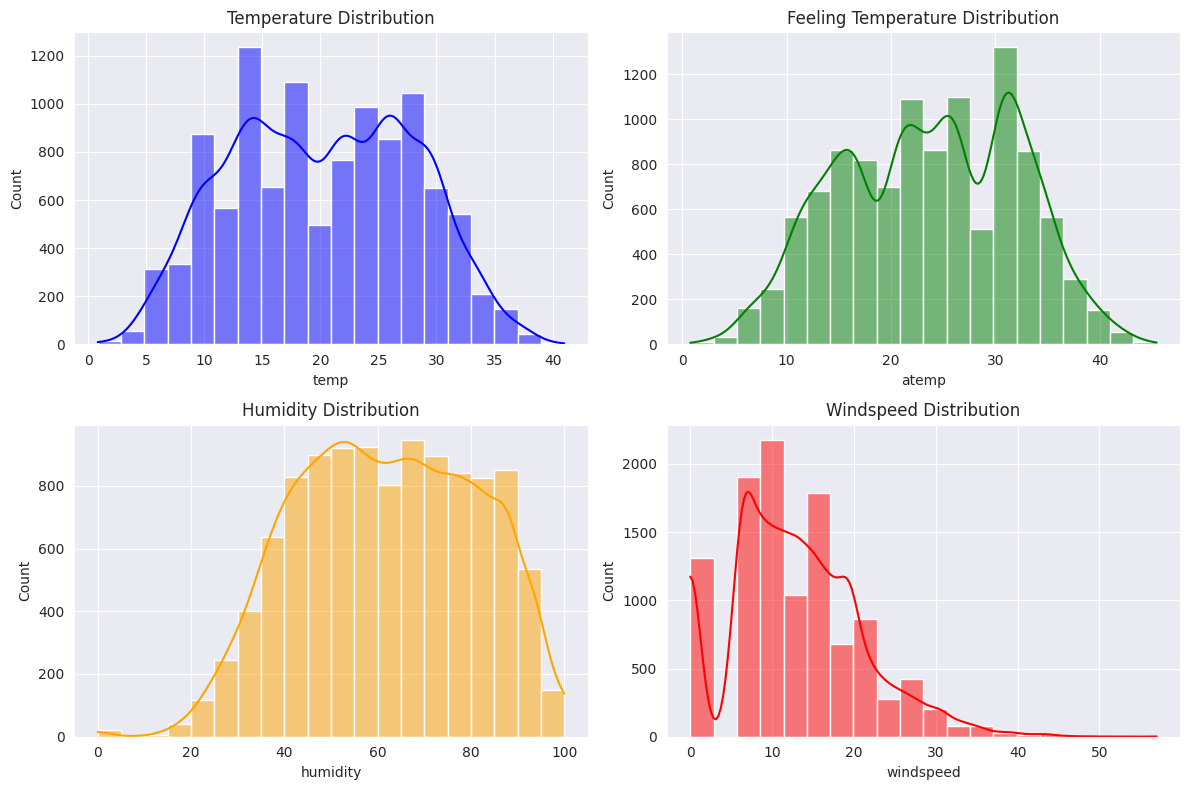

In [32]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['temp'], kde=True, bins=20, color='blue')
plt.title('Temperature Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['atemp'], kde=True, bins=20, color='green')
plt.title('Feeling Temperature Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['humidity'], kde=True, bins=20, color='orange')
plt.title('Humidity Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['windspeed'], kde=True, bins=20, color='red')
plt.title('Windspeed Distribution')

plt.tight_layout()
plt.show()

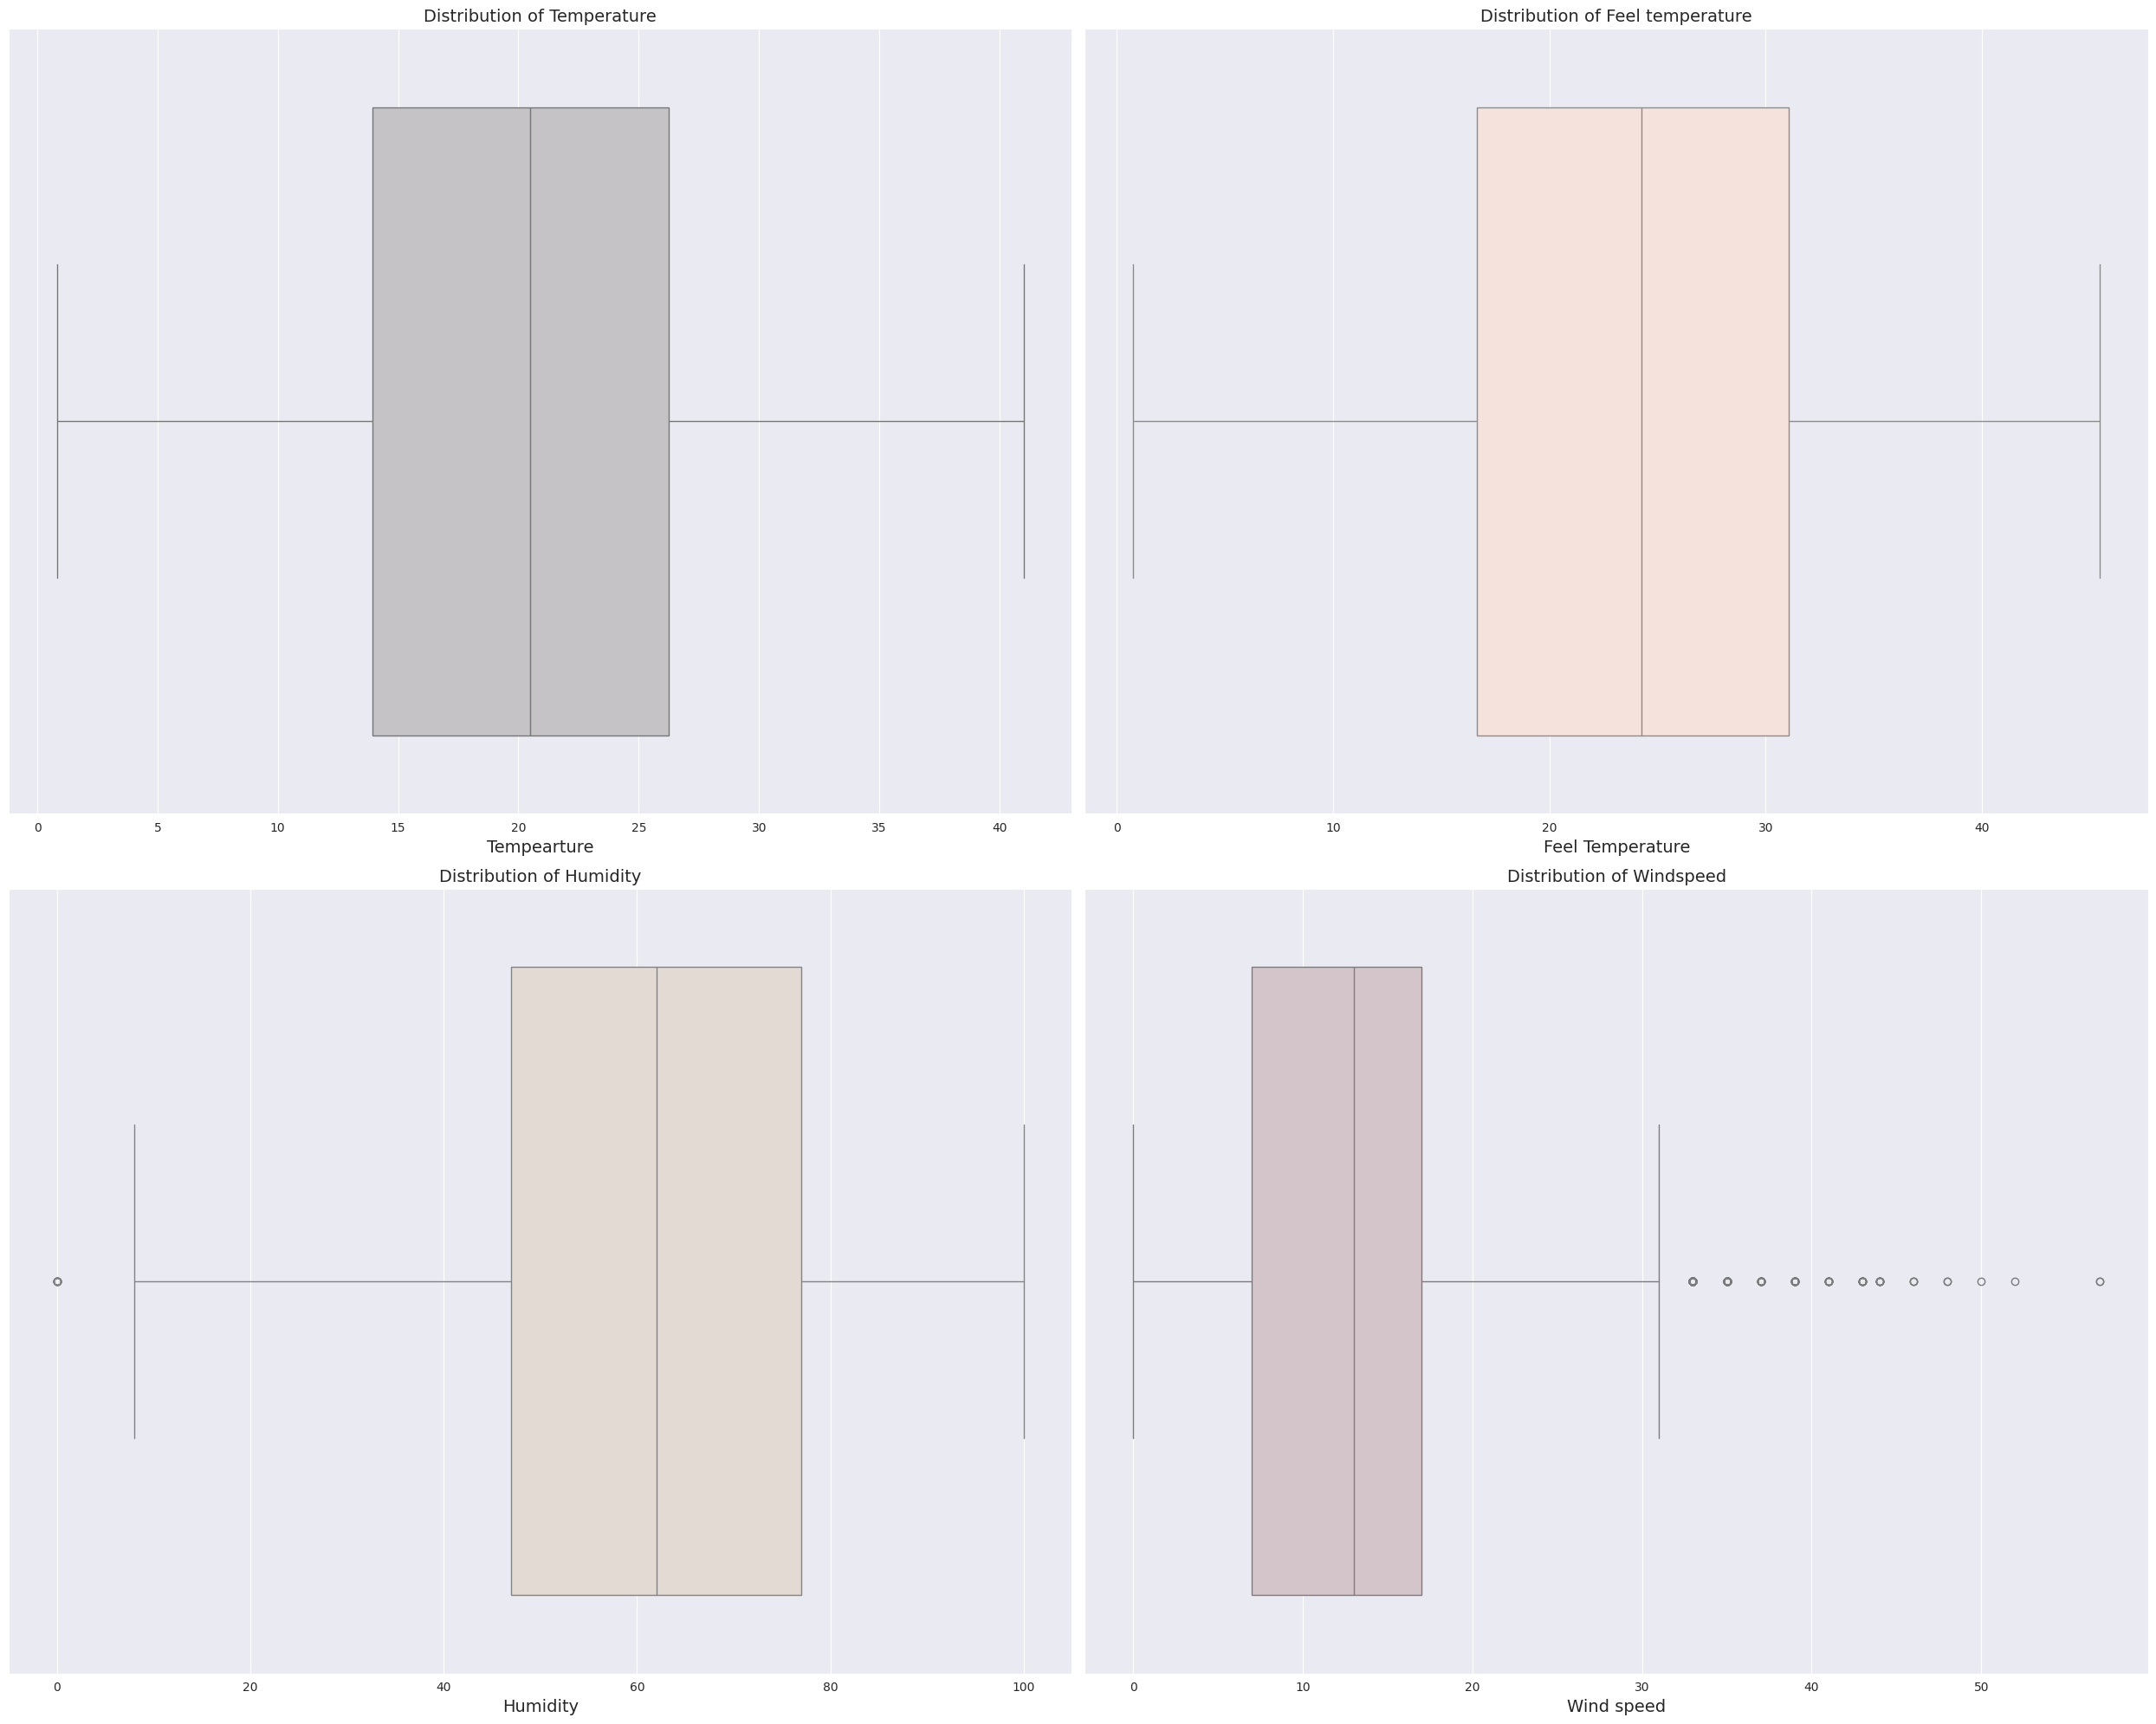

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,20))

# Boxplot for temp column
plt.subplot(2,2,1)
sns.boxplot(data=df,x='temp',color='#C5C3C6')
plt.xlabel('Tempearture',fontsize=14)
plt.title('Distribution of Temperature',fontsize=14)

#Boxplot for feel temperature
plt.subplot(2,2,2)
sns.boxplot(data=df,x='atemp',color='#F9E0D9')
plt.xlabel('Feel Temperature',fontsize=14)
plt.title('Distribution of Feel temperature',fontsize=14)

#Boxplot for Humidity
plt.subplot(2,2,3)
sns.boxplot(data=df,x='humidity',color='#E6DBD0')
plt.xlabel('Humidity',fontsize=14)
plt.title('Distribution of Humidity',fontsize=14)

#Boxplot for Wind Speed
plt.subplot(2,2,4)
sns.boxplot(data=df,x='windspeed',color='#D6C3C9')
plt.xlabel('Wind speed',fontsize=14)
plt.title('Distribution of Windspeed',fontsize=14)

plt.tight_layout()
plt.show()

<h2><b>Inference:</b></h2>

* No outliers are detected in the 'temp' and 'atemp' columns, suggesting that the temperature-related data points fall within the expected range.
* In the 'humidity' column, a single value is identified as an outlier, implying an unusual humidity measurement distinct from the others.
* The 'windspeed' column contains 12 outlier values, indicating instances where wind speed measurements significantly deviate from the typical range.


<h2><b>Barplots for categorical variables</b></h2>

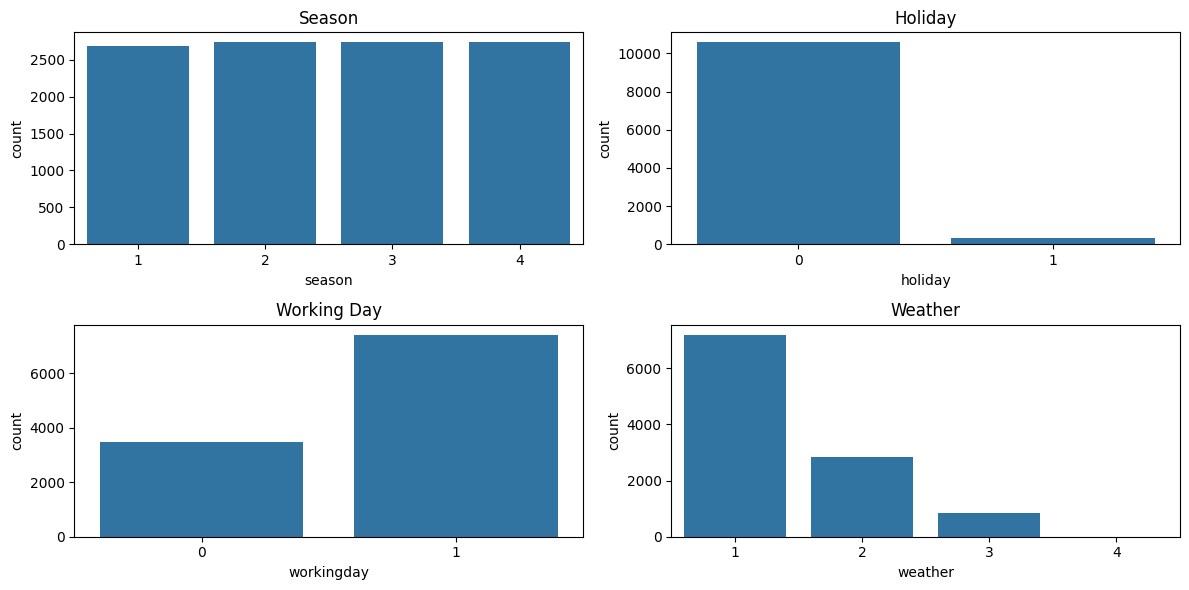

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='season')
plt.title('Season')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='holiday')
plt.title('Holiday')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='workingday')
plt.title('Working Day')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='weather')
plt.title('Weather')

plt.tight_layout()
plt.show()

<h2><b>Inference:</b></h2>

* On working days, 68.6% of cycles are rented, whereas on non-working days, 31.4% of cycles are rented.
* During the fall season, approximately 30.7% of cycles are rented,in the summer season, around 28.2% of cycles are rented whereas the winter season records a rental rate of about 26.1% for cycles.The lowest rental rate, at just 15%, is observed in the spring season.
* Weather condition 1 experiences the highest rental rate, with approximately 70.8% of cycles rented.

<h2><b>Hourly Trends in Average Cycle Rentals</b></h2>

In [36]:
hour_df=df.groupby(df['datetime'].dt.hour).agg(average_cycles_rented=('count','mean')).reset_index()
hour_df

,datetime,average_cycles_rented
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


<h2><b>Insights:</b></h2>


* The peak hours for bike rentals are observed at 5 PM, 6 PM, and 8 AM, indicating distinct periods of high popularity for cycling.
* Conversely, the lowest bike rental counts occur at 4 AM, with 3 AM and 5 AM also showing minimal demand, representing the early morning hours with the least interest in cycling.
* Notably, there's a rising trend in bike rentals from 5 AM to 8 AM, suggesting increased demand during the early morning hours as people begin their day.
* Additionally, there's a declining trend in bike rentals from 5 PM to 11 PM, signaling a gradual decrease in demand as the day transitions into the evening and nighttime.

<h2><b>Montly trend in average cycle rentals</b></h2>

In [37]:
month_df=df.groupby(df['datetime'].dt.month).agg(average_cycles_rented=('count','mean')).reset_index()
month_df

,datetime,average_cycles_rented
0,1,90.366516
1,2,110.003330
2,3,148.169811
3,4,184.160616
4,5,219.459430
5,6,242.031798
6,7,235.325658
7,8,234.118421
8,9,233.805281
9,10,227.699232


<h2><b>Insights:</b></h2>

* Peak demand for rental bikes is seen in June, July, and August, aligning with the summer months.
* Conversely, the lowest average hourly bike rentals occur in January, February, and March, indicating reduced cycling activity during winter.
* Notably, there's a rising trend in average bike rentals from February to June as the season transitions from winter to spring and summer.
* Conversely, a declining trend in average bike rentals is noted from October to December as winter sets in.

<h2><b>Distribution of Casual count, Registered count and Total count</b></h2>

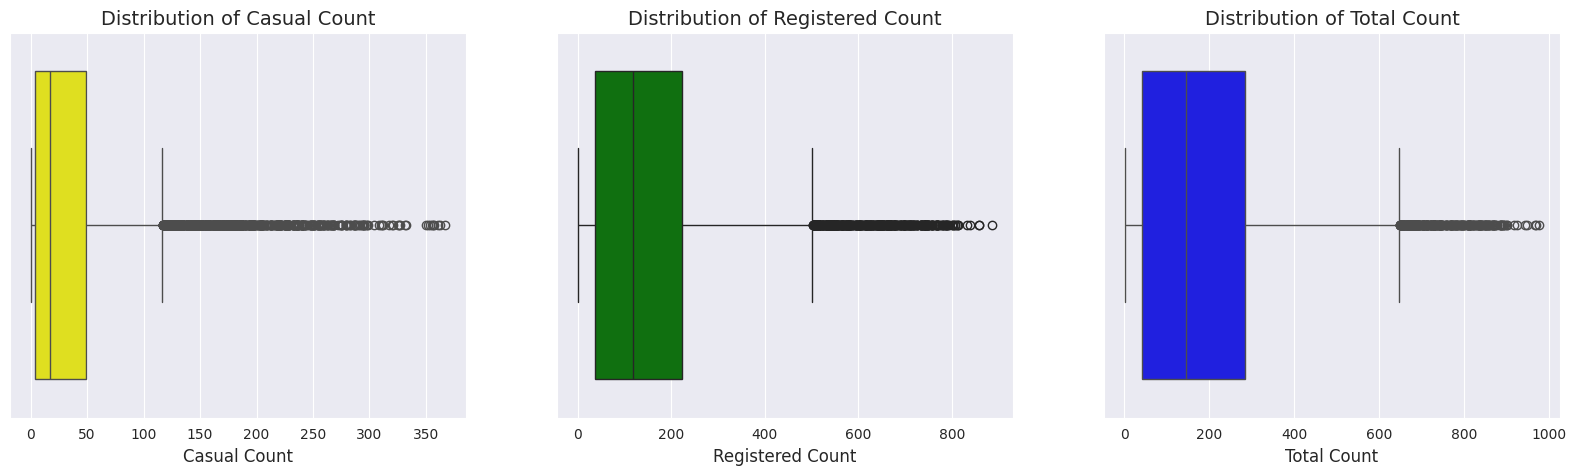

In [34]:
plt.figure(figsize=(20,5))

# Boxplot for temp column
plt.subplot(1,3,1)
sns.boxplot(data=df,x='casual',color='yellow')
plt.xlabel('Casual Count',fontsize=12)
plt.title('Distribution of Casual Count',fontsize=14)

#Boxplot for feel temperature
plt.subplot(1,3,2)
sns.boxplot(data=df,x='registered',color='green')
plt.xlabel('Registered Count',fontsize=12)
plt.title('Distribution of Registered Count',fontsize=14)

#Boxplot for Humidity
plt.subplot(1,3,3)
sns.boxplot(data=df,x='count',color='blue')
plt.xlabel('Total Count',fontsize=12)
plt.title('Distribution of Total Count',fontsize=14)


plt.show()

<h2><b>Inference:</b></h2>

* The box plot suggests outliers are present in both casual and registered user numbers.
* Further analysis involving independent variables is necessary before drawing definitive conclusions.
* Skewness in the data is indicated by the box plot.
* The decision to address outliers or apply variable transformation will be made as we proceed.

<h1><b>Bivariate Analysis</b></h1>
<br>
<h2><b>Relationship between workingday and count</b></h2>

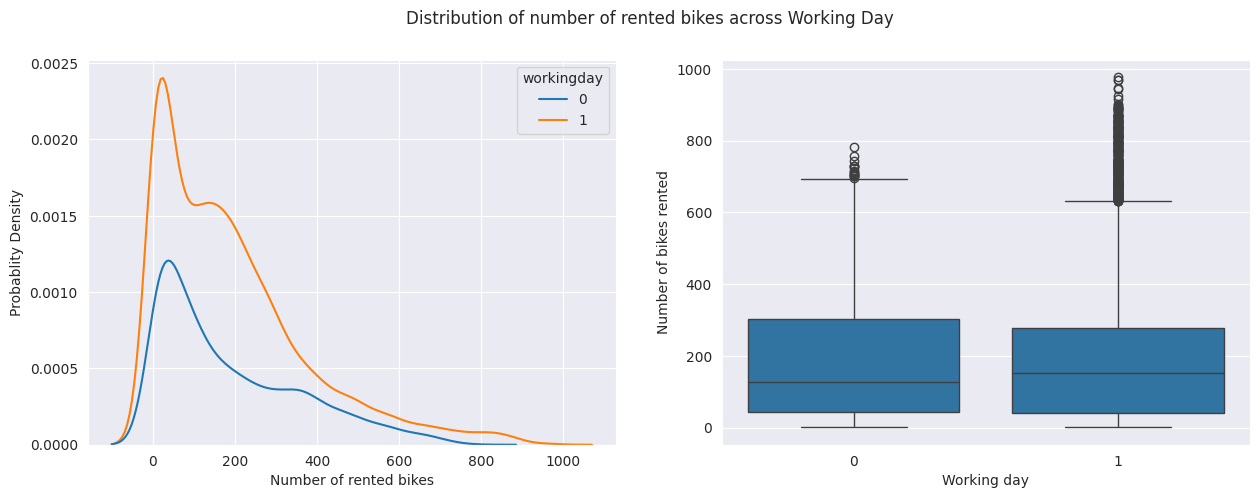

In [39]:
plt.figure(figsize=(15,5))
# KDE plot
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.kdeplot(data=df,x='count',hue='workingday')
plt.xlabel('Number of rented bikes')
plt.ylabel('Probablity Density')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df,y='count',x='workingday')
plt.xlabel('Working day')
plt.ylabel('Number of bikes rented')

plt.suptitle('Distribution of number of rented bikes across Working Day')
plt.show()

<h3><b>Inference:</b></h3>

* There is a higher probability of bike rentals on working days compared to non-working days, with 68.6% occurring on working days and 31.4% on non-working days.
* Hypothesis testing will provide statistical evidence to validate whether this observed difference is meaningful or occurred by chance.

<h2><b>Relationship between season and count</b></h2>

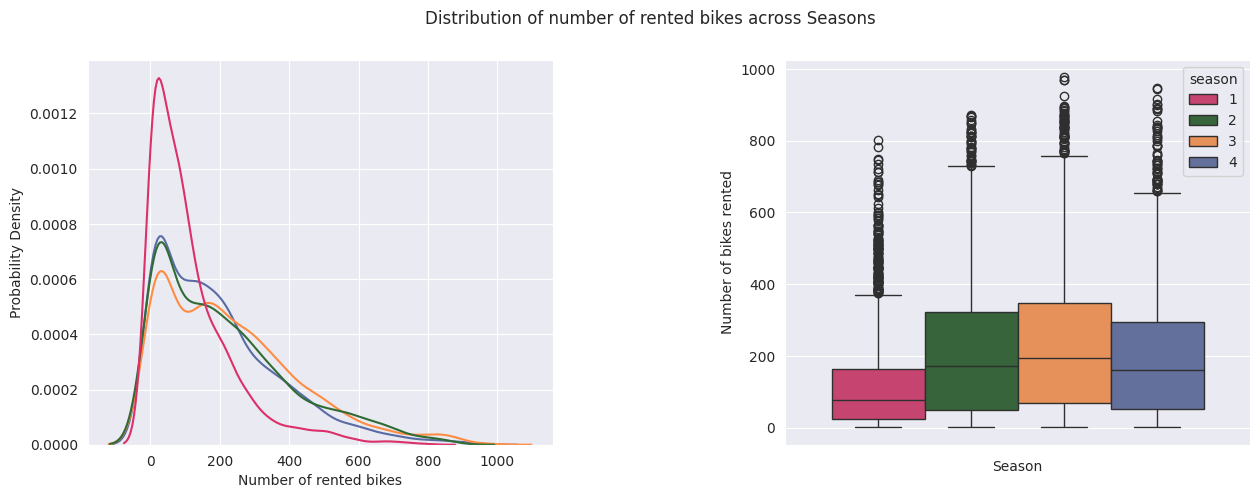

In [48]:
plt.figure(figsize=(15,5))

# KDE plot
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.kdeplot(data=df, x='count', hue='season', palette=['#DB3069','#306B34','#FF8C42','#586BA4'], legend=False)
plt.xlabel('Number of rented bikes')
plt.ylabel('Probability Density')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df, y='count', hue='season', palette=['#DB3069','#306B34','#FF8C42','#586BA4'])
plt.xlabel('Season')
plt.ylabel('Number of bikes rented')
plt.subplots_adjust(wspace=0.5)

plt.suptitle('Distribution of number of rented bikes across Seasons')
plt.show()




<h3><b>Inference:</b></h3>


* The likelihood of renting a bike is notably higher during the fall season compared to other seasons.
* Conversely, the probability of bike rentals during winter and spring is lower than during summer and fall.
* Further investigation will involve conducting an ANOVA test to assess if the season significantly influences bike rentals.

<h2><b>Relationship between weather and count</b></h2>

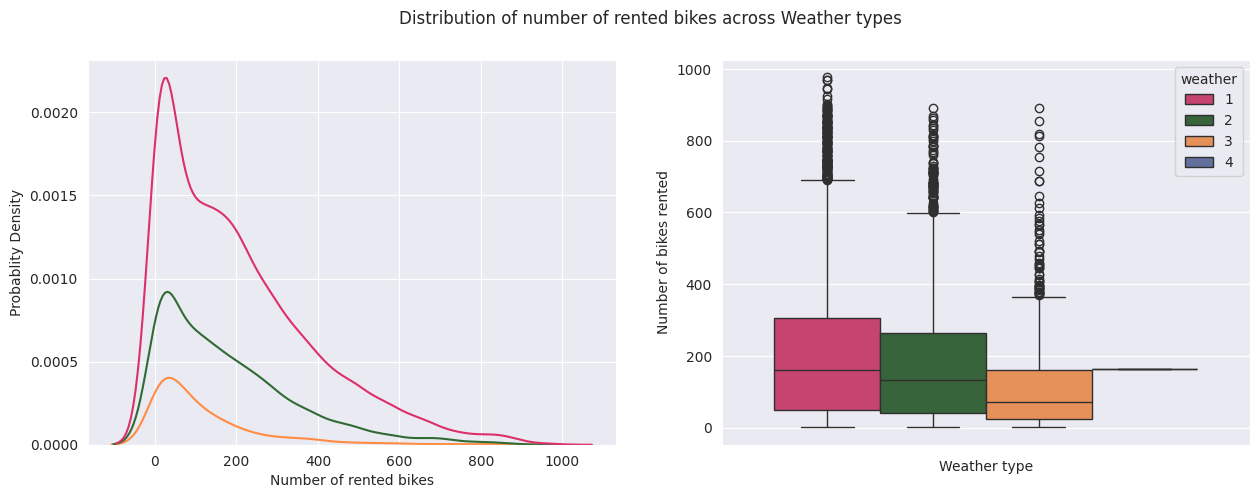

In [49]:
plt.figure(figsize=(15,5))

# KDE plot
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.kdeplot(data=df,x='count',hue='weather',palette=['#DB3069','#306B34','#FF8C42','#586BA4'],warn_singular=False,legend = False)
plt.xlabel('Number of rented bikes')
plt.ylabel('Probablity Density')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df,y='count',hue='weather',palette=['#DB3069','#306B34','#FF8C42','#586BA4'])
plt.xlabel('Weather type')
plt.ylabel('Number of bikes rented')

plt.suptitle('Distribution of number of rented bikes across Weather types')
plt.show()


<h3><b>Inference:</b></h3>

* The analysis suggests a higher likelihood of bike rentals during weather condition 1 compared to other weather types.
* Approximately 70.8% of bike rentals are observed in weather condition 1, while the remaining weather types collectively contribute to approximately 29% of rentals.
* Further investigation will involve conducting an ANOVA test to determine if weather type significantly influences the number of bikes rented.

<h2><b>Heatmap and Correlation</b></h2>

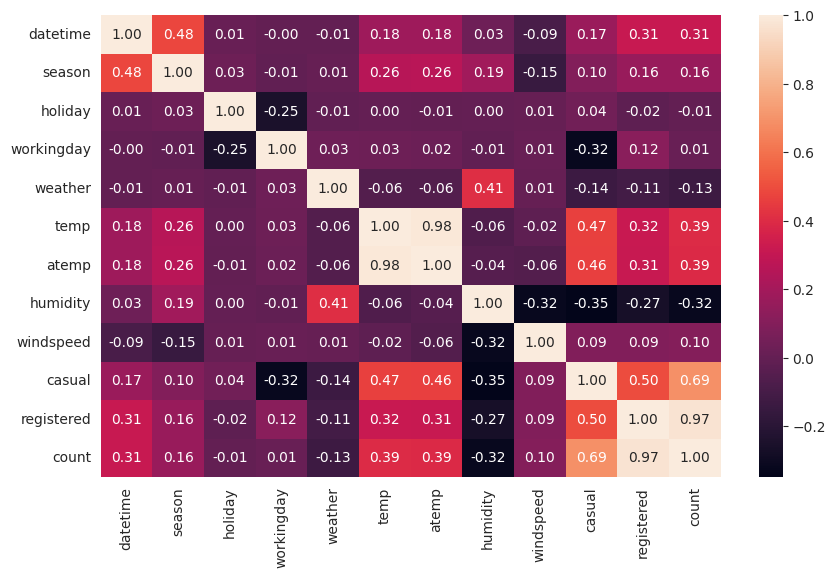

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True,cmap='rocket',fmt='.2f')
plt.show()

<h2><b>Insights:</b></h2>

* A weak positive correlation of 0.39 exists between temperature and bike rentals, indicating that fewer people tend to use electric cycles during daytime hours from 12 PM to 3 PM.
* This correlation aligns with the finding from our univariate analysis, which showed lower average bike rentals during this time frame compared to other times of the day.
* A similar correlation pattern is observed with "feels-like" temperature, further supporting this trend.
* The negative correlation between humidity and bike rentals suggests that people avoid using electric bikes during high humidity conditions due to discomfort and potential performance issues.
* Factors such as sweating and reduced efficiency of electric bikes in high humidity contribute to this avoidance, leading to a preference for alternative transportation or indoor activities.
* There is a weak positive correlation between windspeed and bike rentals, indicating that some individuals prefer using electric cycles during windy conditions for the enjoyment of the experience.
* While this preference contributes to a slight increase in bike rentals on windier days, the effect is not particularly strong, suggesting that the enjoyment of cycling in windy conditions is a relatively niche preference among riders.

<h1><b>Hypothesis Testing </h1></b>
<br>
<h2><b>Does Working day has an effect on the number of bikes rented?</h2></b>
<br>
<h3><b>Formulating Null and Alternative Hypothesis</b></h3>
To answer the above question we first set up Null and Alternate Hypothesis:

<b>H0 </b>: Working day does not have an effect on number of cycles rented<br>
<b>Ha </b>: Working day does have an effect on number of cycles rented<br>
<b>Solution</b>: To test the above hypothesis, we use Two sample T Test<br>
<br>

<h3><b>Assumptions of a T Test</b></h3>

* Independence : The observations in one sample are independent of the observations in the other sample.
* Normality : Both samples are approximately normally distributed.
* Homogenity of Variances : Both samples have approximately the same variance.
* Random Sampling : Both samples were obtained using random sampling method
<br><br>

<h3><b>Normality Check: Wilkin Shapiron Test</b></h3>

* To conduct the above experiment, we shall take the samples randomly, and also the number of electric cyles rented on Working day and non working day are independent.
* We however have to check for Normality and homogenity of Variances
<br><br>
<b>Generating a sample of 300 bike rentals, randomly selected from both working days and non-working days and checking for normality using histogram</b>

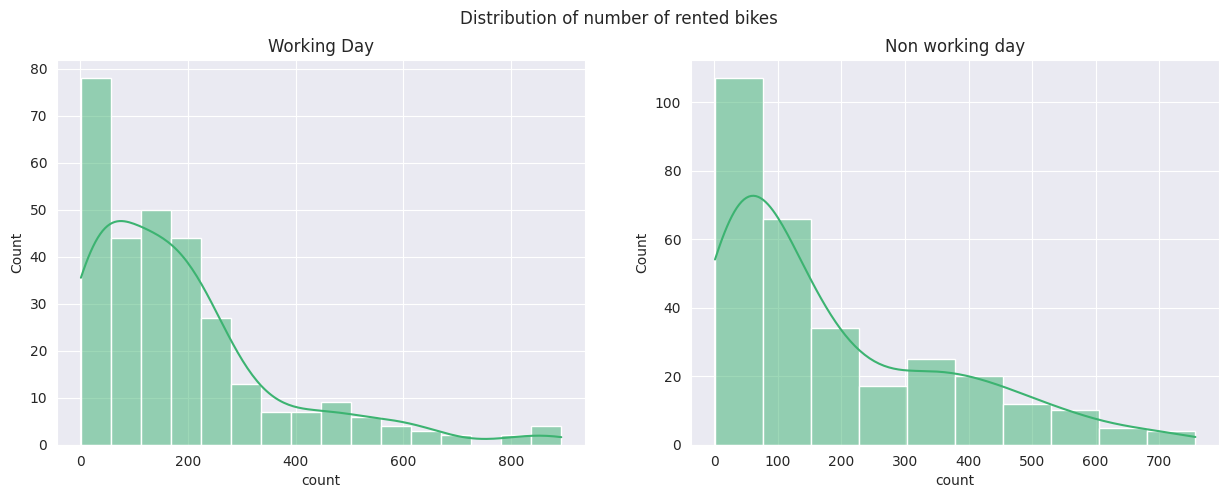

In [53]:
workingday_sample=df[df['workingday']==1]['count'].sample(300)
nonworkingday_sample=df[df['workingday']==0]['count'].sample(300)

plt.figure(figsize=(15,5))

#histogram for working day sample
plt.subplot(1,2,1)
sns.histplot(workingday_sample,kde=True,color='mediumseagreen')
plt.title('Working Day')

#histogram for non working day sample
plt.subplot(1,2,2)
sns.histplot(nonworkingday_sample,kde=True,color='mediumseagreen')
plt.title('Non working day')

plt.suptitle('Distribution of number of rented bikes')
plt.show()

<h3><b>Inference:</b></h3>

* The counts of rented cycles on both working and non-working days do not follow a normal distribution.
* We can try to convert the distribution to normal by applying log transformation

<br><br>
<b>Converting sample distribution to normal by applying log transformation</b>

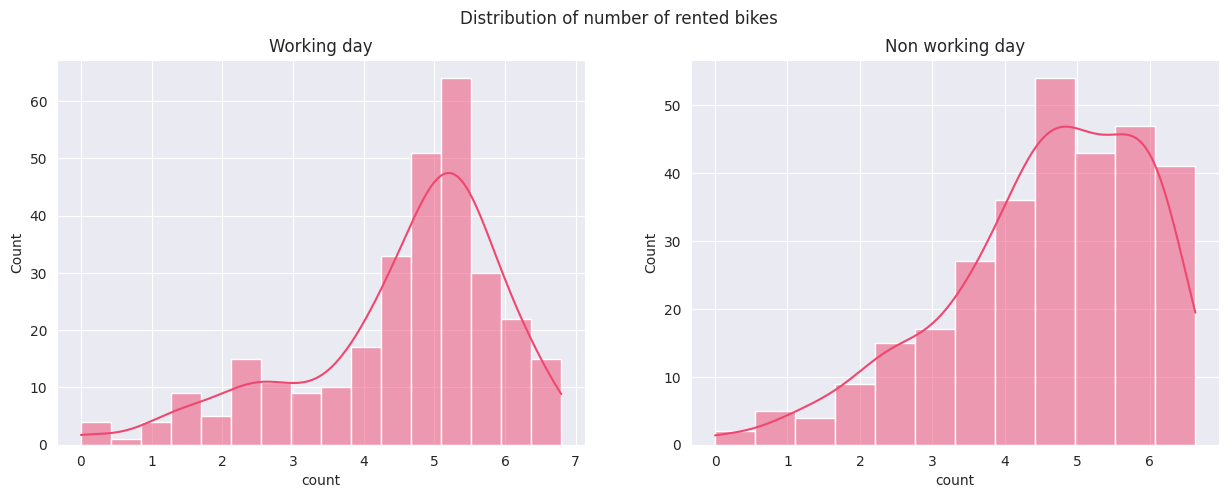

In [54]:
plt.figure(figsize=(15,5))

#histogram for working day sample
plt.subplot(1,2,1)
sns.histplot(np.log(workingday_sample),kde=True,color='#ef476f')
plt.title('Working day')

#histogram for non working day sample
plt.subplot(1,2,2)
sns.histplot(np.log(nonworkingday_sample),kde=True,color='#ef476f')
plt.title('Non working day')

plt.suptitle('Distribution of number of rented bikes')
plt.show()


<b>Inference: </b><br>
Upon implementing a log transformation on our continuous variables, we observed a substantial improvement in achieving a distribution that closely resembles normality for both the workingday_sample and nonworkingday_sample

<h3><b>Performing the Wilk-Shapiro test for the workingday sample</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The Working day samples are normally distributed
* Ha: The Working day samples are not normally distributed</i></b>

In [57]:
test_stat,p_value= shapiro(np.log(workingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The working day samples are not normally distributed ")
else:
 print("Fail to Reject Ho: The working day samples are normally distributed")

test stat : 0.9101254940032959
p value : 2.1075701947537162e-12

Reject Ho: The working day samples are not normally distributed 


<b>Inference:</b>

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the working day sample data does not come from normal distribution.


<h3><b>Performing the Wilk-Shapiro test for the non-working day sample</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The non working day samples are normally distributed
* Ha: The non working day samples are not normally distributed</i></b>

In [58]:
test_stat,p_value= shapiro(np.log(nonworkingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The non working day samples are not normally distributed ")
else:
 print("Fail to Reject Ho: The non working day samples are normally distributed")

test stat : 0.94224613904953
p value : 1.910972935448285e-09

Reject Ho: The non working day samples are not normally distributed 


<b>Inference:</b>

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the non working day sample data does not come from normal distribution.

<br>
<h3><b>Homegenity of Variance test : Levene's Test</b></h3>
We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : Variance is equal in both working day count and non working day count samples
* Ha: Variances is not equal</i></b>


In [59]:
test_stat,p_value= levene(np.log(workingday_sample),np.log(nonworkingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal ")
else:
 print("Fail to Reject Ho: Variance is equal in both working day count and non working day count samples")

test stat : 0.23896683249927336
p value : 0.6251325481804699

Fail to Reject Ho: Variance is equal in both working day count and non working day count samples


<b>Inference:</b><br>

Since p_value is not less than 0.05, we fail to reject null hypothesis.
This means we do not have sufficient evidence to say that variance across workingday count and non workingday count is significantly different thus making the assumption of homogenity of variances true
<br>
<h3><b>T-Test</b></h3>
For T-Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : Working day does not have an effect on number of cycles rented
* Ha: Working day does have an effect on number of cycles rented</i></b>

In [60]:
t_stat,p_value= ttest_ind(np.log(workingday_sample),np.log(nonworkingday_sample),equal_var=True)
print("f stat :",t_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Working day does have an effect on number of cycles rented ")
else:
 print("Fail to Reject Ho: Working day does not have an effect on number of cycles rented")

f stat : 0.0015867389809994016
p value : 0.9987344951647454

Fail to Reject Ho: Working day does not have an effect on number of cycles rented


<h3><b>Conclusion:</b></h3>

* Since the p-value of our test is greater than alpha which is 0.05, we fail to reject the null hypothesis of this test.
* We do not have sufficient evidence to conclude that working days have a significant effect on the number of cycles rented. This suggests that there is no significant difference in the number of cycles rented on working days versus non-working days.

<h2><b>Are number of cycles rented similar or different in different season ?</b></h2>

<b>To perform such an analyis, we use ANOVA test.</b><br>

* Here we have 4 different seasons namely spring,summer,fall & winter.
* With the Annova test, we can find out if the different seasons have same or different effect amongst the number of cycles rented.
<br><br>
<b>Formulating Null and Alternative Hypothesis</b>
We shall setup the Null and Alternate Hypothesis to check if there is any effect of season on the number of cycles rented.

* <b><i>H0: All the 4 different seasons have equal means
* Ha: There is atleast one season that differs significantly from the overall mean of dependent variable.</i></b>
<br><br>

<b>Normality Test: Wilkin Shapiro Test</b>

<br>
Generating a sample of 300 data points for each season



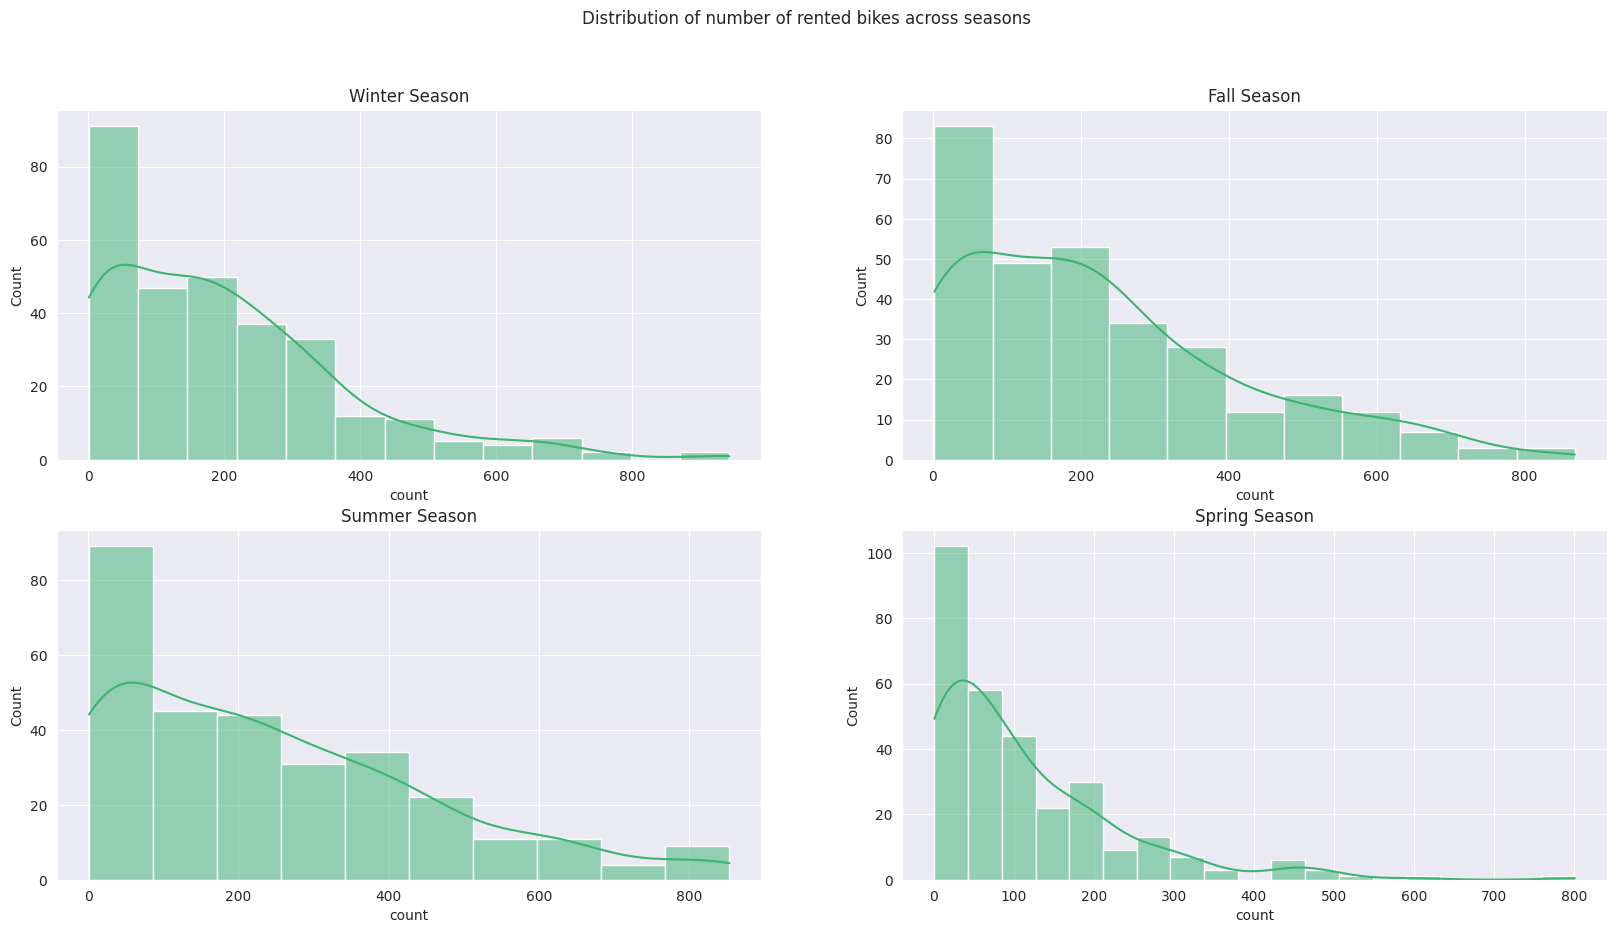

In [63]:
winter_sample=df[df['season']==4]['count'].sample(300)
fall_sample = df[df['season']==2]['count'].sample(300)
summer_sample = df[df['season']==3]['count'].sample(300)
spring_sample = df[df['season']==1]['count'].sample(300)

plt.figure(figsize=(20,10))

#histogram for winter season
plt.subplot(2,2,1)
sns.histplot(winter_sample,kde=True,color='mediumseagreen')
plt.title('Winter Season')

#histogram for fall season
plt.subplot(2,2,2)
sns.histplot(fall_sample,kde=True,color='mediumseagreen')
plt.title('Fall Season')

#histogram for summer season
plt.subplot(2,2,3)
sns.histplot(summer_sample,kde=True,color='mediumseagreen')
plt.title('Summer Season')

#histogram for spring season
plt.subplot(2,2,4)
sns.histplot(spring_sample,kde=True,color='mediumseagreen')
plt.title('Spring Season')

plt.suptitle('Distribution of number of rented bikes across seasons')
plt.show()


<b>Inference:</b>

We see that none of the graphs are normally distributed. Hence we apply log transformation to make these distributions near to normal

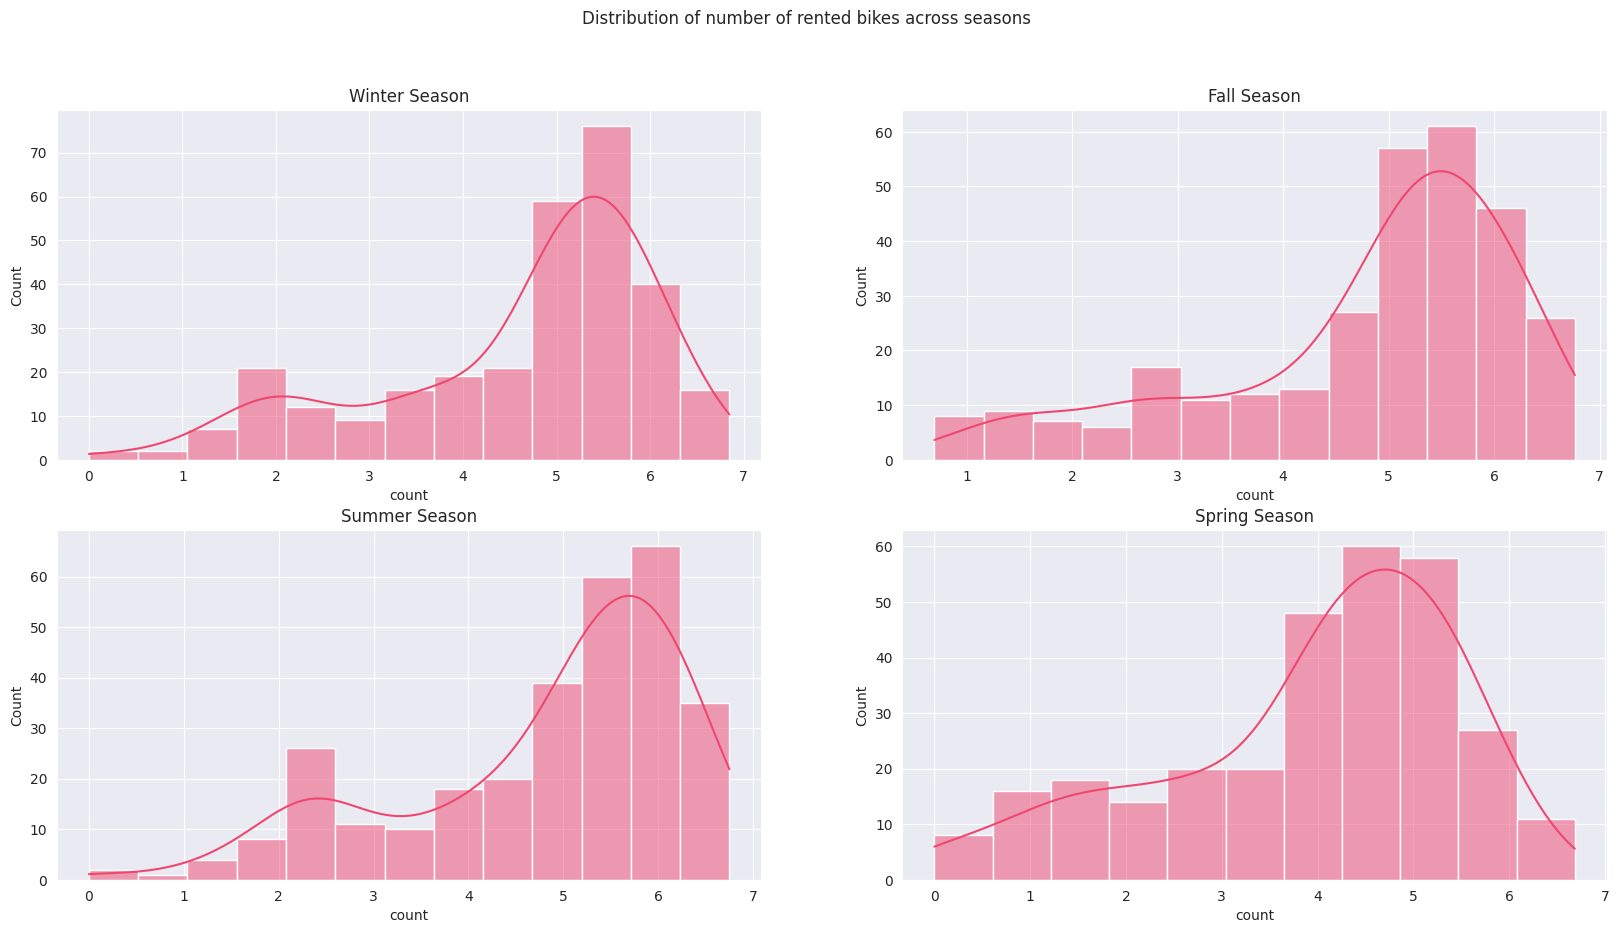

In [64]:
log_winter=np.log(winter_sample)
log_fall=np.log(fall_sample)
log_summer=np.log(summer_sample)
log_spring=np.log(spring_sample)

plt.figure(figsize=(20,10))

#histogram for winter season
plt.subplot(2,2,1)
sns.histplot(log_winter,kde=True,color='#ef476f')
plt.title('Winter Season')

#histogram for fall season
plt.subplot(2,2,2)
sns.histplot(log_fall,kde=True,color='#ef476f')
plt.title('Fall Season')

#histogram for summer season
plt.subplot(2,2,3)
sns.histplot(log_summer,kde=True,color='#ef476f')
plt.title('Summer Season')

#histogram for spring season
plt.subplot(2,2,4)
sns.histplot(log_spring,kde=True,color='#ef476f')
plt.title('Spring Season')

plt.suptitle('Distribution of number of rented bikes across seasons')
plt.show()

<b>Inference:</b>

After applying a log transformation to the samples of each season, it can be inferred that a significant improvement was observed in achieving data distributions that closely resemble normality for each of the seasons.
<br>
We will now conduct the Shapiro-Wilk Test to assess the normality of the log-normal distribution obtained in the previous step

<h3><b>Shapiro-Wilk Test for winter season sample data</h3></b>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The sample follows a normal distribution
* Ha: The sample does not follow a normal distribution</i></b>

In [65]:
test_stat,p_value= shapiro(log_winter)
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8909155130386353
p value : 7.652902020861135e-14

Reject Ho: The sample does not follow a normal distribution


<b>Inference:</b>

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.
<br>
<h3><b>Shapiro-Wilk Test for fall season sample data</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The sample follows a normal distribution
* Ha: The sample does not follow a normal distribution</i></b>

In [66]:
test_stat,p_value= shapiro(log_fall)
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8821711540222168
p value : 1.932213951013652e-14

Reject Ho: The sample does not follow a normal distribution


<b>Inference:</b>

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test.
<br>
<h3><b>Shapiro-Wilk Test for summer season sample data</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The sample follows a normal distribution
* Ha: The sample does not follow a normal distribution</i></b>

In [67]:
test_stat,p_value= shapiro(log_summer)
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8905848860740662
p value : 7.25488733758356e-14

Reject Ho: The sample does not follow a normal distribution


<b>Inference:</b>

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test.
<br>
<h3><b>Shapiro-Wilk Test for spring season sample data</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The sample follows a normal distribution
* Ha: The sample does not follow a normal distribution</i></b>

In [68]:
test_stat,p_value= shapiro(log_spring)
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9282143712043762
p value : 7.654955141989106e-11

Reject Ho: The sample does not follow a normal distribution


<b>Inference:</b>

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test
<br>
<h3><b>Homegenity of Variance test : Levene's Test</b></h3>
We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The variance is equal across all groups
* Ha : The variance is not equal across the groups</i></b>

In [69]:
test_stat,p_value= levene(log_winter,log_fall,log_summer,log_spring,center='median')
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal across the groups ")
else:
 print("Fail to Reject Ho: Variance is equal across all groups")

test stat : 0.8355666717657763
p value : 0.47436593814164907

Fail to Reject Ho: Variance is equal across all groups


<b>Inference:</b>

* Since p-value is not less than 0.05, we fail to reject the null hypothesis.
* This means we do not have sufficient evidence to claim a significant difference in variance across the different seasons. Therefore, the assumption of homogeneity of variances can be considered valid.
<br><br>
<h3><b>ANOVA Test</b></h3>
For ANOVA Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The mean number of cycles rented is the same across different seasons
* Ha: At least one season has a mean number of cycles rented that is significantly different from the others.</i></b>

In [70]:
f_stat,p_value= f_oneway(log_winter,log_fall, log_summer,log_spring)
print("f stat :",f_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is the same across different seasons ")


f stat : 23.515522449082713
p value : 8.626133709658359e-15

Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. 


<b>Conclusion:</b>

* Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
* We have gathered enough evidence to conclude that there is a significant difference in the mean number of cycles rented across all seasons.

<h2><b>Are number of cycles rented similar or different in different weather conditions?</b></h2>

<b>To perform such an analyis, we use ANOVA test</b>
<br><br>
We shall setup the Null and Alternate Hypothesis to check if there is any effect of weather on the number of cycles rented :

* <b><i>H0 : The mean number of cycles rented is the same across all three different weather types.
* Ha : There is at least one weather type with a mean number of cycles rented that significantly differs from the overall mean of the dependent variable.</i></b>
<br>
<h3><b>Normality Test: Shapiro-Wilk Test</b></h3>
Generating a sample of 300 data points for each weather condition and checking for normality using histogram

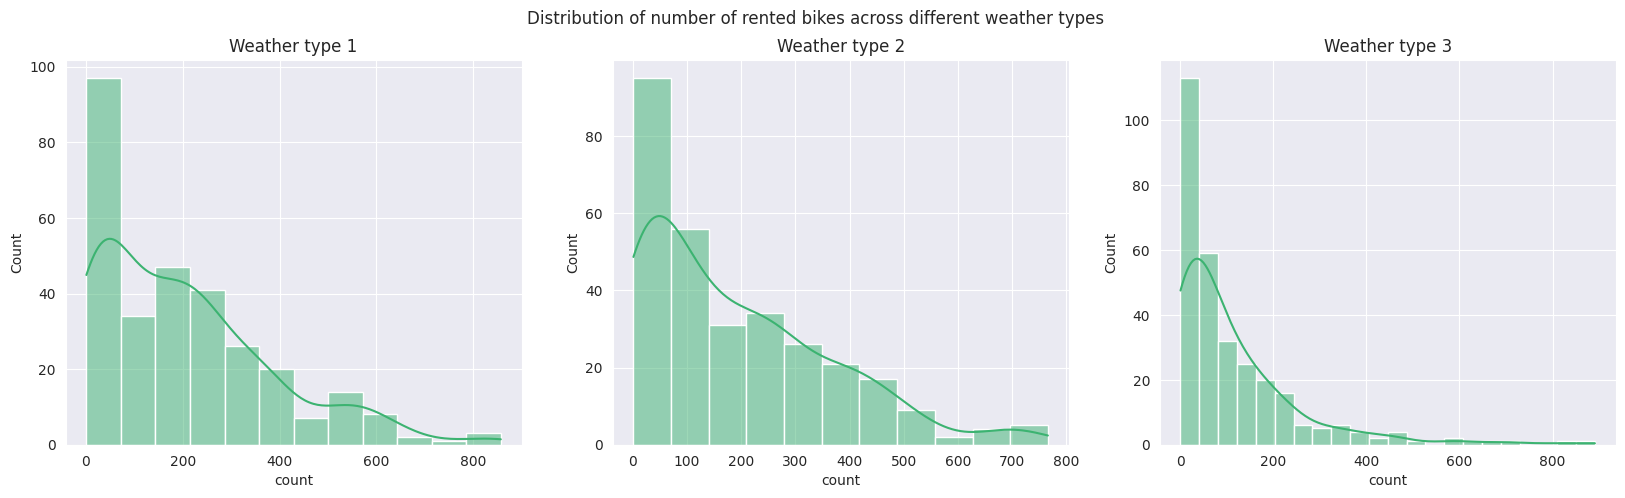

In [71]:
sample_1= df[df['weather']==1]['count'].sample(300)
sample_2 = df[df['weather']==2]['count'].sample(300)
sample_3 = df[df['weather']==3]['count'].sample(300)

plt.figure(figsize=(20,5))

#histogram for weather condition 1
plt.subplot(1,3,1)
sns.histplot(sample_1,kde=True,color='mediumseagreen')
plt.title('Weather type 1')

#histogram for weather condition 2
plt.subplot(1,3,2)
sns.histplot(sample_2,kde=True,color='mediumseagreen')
plt.title('Weather type 2')

#histogram for weather condition 3
plt.subplot(1,3,3)
sns.histplot(sample_3,kde=True,color='mediumseagreen')
plt.title('Weather type 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()

<b>Inference:</b>

We see that none of the graphs are normally distributed. Hence we apply log transformation to make these distributions near to normal
<br>
<b>Converting sample distribution to normal by applying log transformation</b>

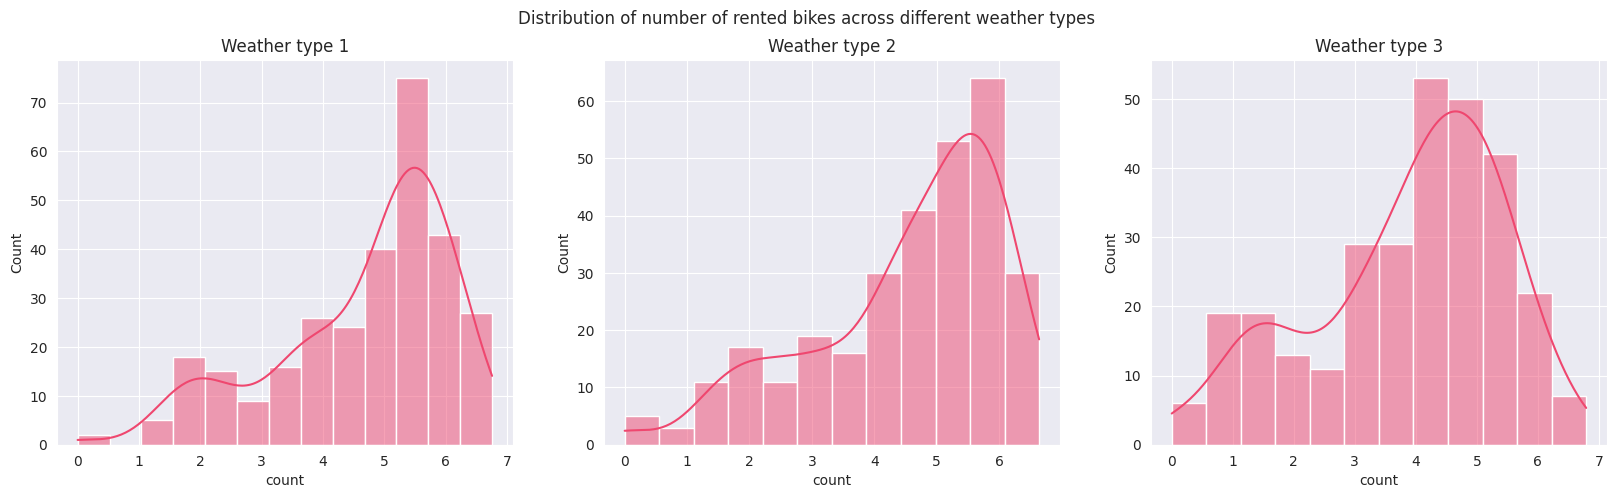

In [72]:
log_1=np.log(sample_1)
log_2=np.log(sample_2)
log_3=np.log(sample_3)

plt.figure(figsize=(20,5))

#histogram for weather condition 1
plt.subplot(1,3,1)
sns.histplot(log_1,kde=True,color='#ef476f')
plt.title('Weather type 1')

#histogram for weather condition 2
plt.subplot(1,3,2)
sns.histplot(log_2,kde=True,color='#ef476f')
plt.title('Weather type 2')

#histogram for weather condition 3
plt.subplot(1,3,3)
sns.histplot(log_3,kde=True,color='#ef476f')
plt.title('Weather type 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()


<b>Inference:</b>

After using a log transformation on the data for each weather type, we noticed a substantial improvement in making the data look more like a normal distribution.
<br>

<h3><b>Shapiro-Wilk Test for weather type 1 sample data</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The sample follows a normal distribution
* Ha: The sample does not follow a normal distribution</i></b>

In [73]:
test_stat,p_value= shapiro(log_1)
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9061854481697083
p value : 1.0290690825517923e-12

Reject Ho: The sample does not follow a normal distribution


<b>Inference:</b>

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.
<br>
<h3><b>Shapiro-Wilk Test for weather type 2 sample data</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The sample follows a normal distribution
* Ha : The sample does not follow a normal distribution</i></b>

In [74]:
test_stat,p_value= shapiro(log_2)
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9069942831993103
p value : 1.190216761953744e-12

Reject Ho: The sample does not follow a normal distribution


<b>Inference:</b>

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.
<br>
<h3><b>Shapiro-Wilk Test for weather type 3 sample data</b></h3>

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The sample follows a normal distribution
* Ha : The sample does not follow a normal distribution</i></b>

In [75]:
test_stat,p_value= shapiro(log_3)
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9496367573738098
p value : 1.2714941988178907e-08

Reject Ho: The sample does not follow a normal distribution


<b>Inference:</b>

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.
<br><br>

<b>Final Conclusion:</b>

None of the weather type samples adhere to a normal distribution even after applying the log-normal transformation, indicating that the normality assumption of the ANOVA test is not met.
<br>

<h3><b>Homegenity of Variance test : Levene's Test</b></h3>
We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The variance is equal across all groups
* Ha : The variance is not equal across the groups</i></b>

In [76]:
test_stat,p_value= levene(log_1,log_2,log_3,center='median')
print("test stat :",test_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal across the groups ")
else:
 print("Fail to Reject Ho: Variance is equal across all groups")

test stat : 1.3670369681219507
p value : 0.25539144972681815

Fail to Reject Ho: Variance is equal across all groups


<b>Inference:</b>

* Since p-value is not less than 0.05, we fail to reject the null hypothesis.
* This means we do not have sufficient evidence to claim a significant difference in variance across the different weather types. Therefore, the assumption of homogeneity of variances can be considered valid.<br><br>
<h3><b>ANOVA Test</b></h3>

For ANOVA Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* <b><i>H0 : The mean number of cycles rented is equal across different weather conditions.
* Ha: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others.</i></b>


In [77]:
f_stat,p_value= f_oneway(log_winter,log_fall, log_summer,log_spring)
print("test stat :",f_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is equal across different weather conditions")

test stat : 23.515522449082713
p value : 8.626133709658359e-15

Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others 


<b>Conclusion:</b>

* Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
* Indeed, this indicates that we have collected sufficient evidence to conclude that there is a significant difference in the mean number of cycles rented across all weather conditions.
* Additionally, this suggests that weather conditions do have a notable effect on the number of cycles rented.
<br><br>
<h2><b>Is weather type dependent on the season</b></h2>

<b>To perform such an analysis we perform Chi square test</b>


In [78]:
data=pd.crosstab(df['weather'],df['season'])
data

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


As previously mentioned, there is only one row in our dataset for weather type 4. We lack sufficient information to determine if it truly correlates with the season. To avoid potential biases and skewed results, we will exclude this rare weather type from our analysis.

In [79]:
df_removed_weather=df[~(df['weather']==4)]
data=pd.crosstab(df_removed_weather['weather'],df_removed_weather['season'])
data

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


<h3><b>Chi-Square Test</b></h3>
We shall setup Null and alternate Hypotheis to check if Weather is dependent on season

* <b><i>H0: Weather is not dependent on the season
* Ha: Weather is dependent on the season, meaning they are associated or related
* We consider level of significance as 0.05</i></b>

In [80]:
x_stat,p_value,dof,expected=chi2_contingency(data)
print("X stat :",x_stat)
print("p value :",p_value)
print()
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Weather is dependent on the season")
else:
 print("Fail to Reject Ho: Weather is not dependent on the season")

X stat : 46.101457310732485
p value : 2.8260014509929403e-08

Reject Ho: Weather is dependent on the season


<b>Conclusion:</b>

* Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
* Indeed, this suggests that we have gathered enough evidence to conclude that there is a dependence between weather and the season.

<h2><b>Recommendations:</b></h2>

* Adjust fleet allocation and marketing strategies based on customer demand trends to ensure bikes are available when and where needed most, regardless of working or non-working days.
* Utilize notifications to inform users of bike availability and incentives during periods of lower demand, encouraging rentals.
* Introduce seasonal promotions and discounts to attract more riders during peak seasons, such as summer discounts.
* Manage bike availability effectively during peak seasons through maintenance, distribution, and tracking to prevent shortages or excess bikes.
* Provide weather-ready bikes equipped with features like fenders and all-weather tires to ensure rider comfort and safety during adverse weather conditions.
* Prioritize rider safety by providing guidelines and recommendations for riding in specific weather conditions and ensuring bikes are well-maintained.
* Designate off-peak hours for routine maintenance and battery charging to optimize bike readiness for peak hours.
* Capitalize on downtime for maintenance and charging by strategically deploying bikes to high-demand areas in preparation for peak periods.